# **Problem Statement :--**

Build a machine learning model that classifies news articles as Real or Fake using a neural network based on textual features.

# **Objectives :-**-

* Clean and preprocess raw news text

* Convert text into numerical vectors

* Build and train a neural network model

* Evaluate model performance

* Predict whether new/unseen news is fake or real

# **Import Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# 2. Data Loading and Preprocessing
df = pd.read_csv("/content/FakeNewsNet.csv")

In [3]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [4]:
df.tail()

,title,news_url,source_domain,tweet_num,real
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0
23195,Kelly Clarkson Performs a Medley of Kendrick L...,https://www.billboard.com/articles/news/bbma/8...,www.billboard.com,85,1


In [5]:
df.shape

(23196, 5)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_num,23196.0,88.956803,488.694592,0.0,11.0,37.0,65.0,29060.0
real,23196.0,0.751897,0.431921,0.0,1.0,1.0,1.0,1.0


In [7]:
df.dtypes

,0
title,object
news_url,object
source_domain,object
tweet_num,int64
real,int64


In [8]:
df.isnull().sum()

,0
title,0
news_url,330
source_domain,330
tweet_num,0
real,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [10]:
df = df[['title','real']]
df.dropna(inplace=True)

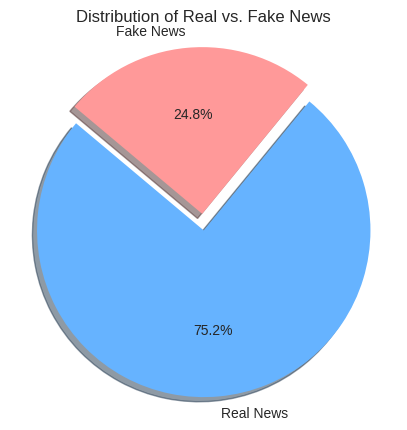

In [28]:
import matplotlib.pyplot as plt

# Count the occurrences of real (1) and fake (0) news
real_fake_counts = df['real'].value_counts()

# Define labels for the pie chart
labels = ['Real News', 'Fake News']
colors = ['#66b3ff','#ff9999']
explode = (0.1, 0)  # explode 1st slice (Real News)

# Create the pie chart
plt.figure(figsize=(5,5))
plt.pie(real_fake_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Real vs. Fake News')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Preprocessing:--**
Convert raw text into machine-readable form:

* Tokenize the words

* Transform text into sequences

* Apply padding to make all sequences the same length


In [13]:
X = df['title'].astype(str)
y = df['real']

tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=300)

# Train–Test Split
Divide data into training (for model learning) and testing (for accuracy checking).

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    padded, y, test_size=0.2, random_state=42)

# **Build Neural Network Model:--**
Create a simple but effective model using:

* Embedding layer for text representation

* Pooling layer for feature extraction

* Dense layers for classification

* Compile the model with appropriate loss and optimizer.

In [15]:
model = Sequential([
    Embedding(20000, 64, input_length=300),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# **Train Model**
Train the neural network on the training data to learn patterns that distinguish fake and real news.

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7564 - loss: 0.5641 - val_accuracy: 0.7387 - val_loss: 0.5861
Epoch 2/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7511 - loss: 0.5627 - val_accuracy: 0.7387 - val_loss: 0.5741
Epoch 3/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7483 - loss: 0.5629 - val_accuracy: 0.7387 - val_loss: 0.5735
Epoch 4/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7584 - loss: 0.5496 - val_accuracy: 0.7387 - val_loss: 0.5623
Epoch 5/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7591 - loss: 0.5409 - val_accuracy: 0.7387 - val_loss: 0.5469


# **Evaluate Model**
Test the model on unseen data and compute metrics such as accuracy, precision, recall, and F1-score.

In [17]:
pred = model.predict(X_test)
pred = (pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.75625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1131
           1       0.76      1.00      0.86      3509

    accuracy                           0.76      4640
   macro avg       0.38      0.50      0.43      4640
weighted avg       0.57      0.76      0.65      4640



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Predict on New Text**
Provide any new text to the model, and it outputs whether the news is Fake or Real.

In [18]:
sample = ["This news is going viral about a political scam..."]
seq = tokenizer.texts_to_sequences(sample)
pad = pad_sequences(seq, maxlen=300)
print(model.predict(pad))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0.72923255]]


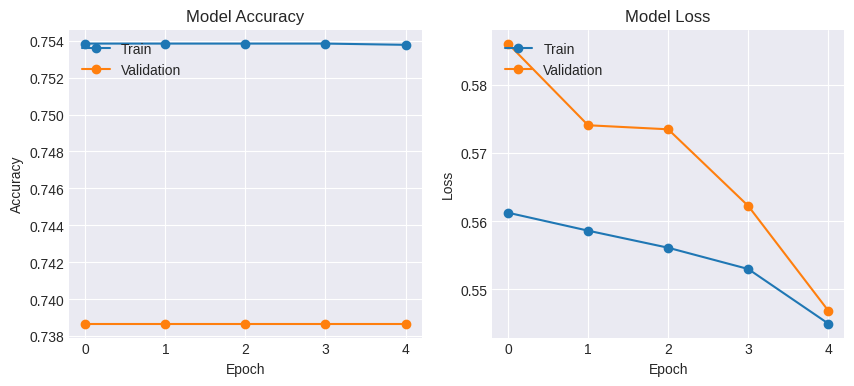

In [29]:
# Ensure history object exists before plotting
if 'history' in locals() and history is not None:
    # Plot training & validation accuracy values
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], marker='o')
    plt.plot(history.history['val_accuracy'], marker='o')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], marker='o')
    plt.plot(history.history['val_loss'], marker='o')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

**Training Accuracy:** measures how accurately the model classifies the data it has already seen during training. An increasing training accuracy usually indicates that the model is learning the patterns in the training data.

**Validation Accuracy:** measures how accurately the model classifies data it has not seen before. This is a crucial metric for understanding how well your model generalizes to new, unseen examples.

**Interpreting the curves:**

If both training and validation accuracy are increasing and staying close together, it suggests the model is learning well and generalizing effectively.
If training accuracy is high but validation accuracy is significantly lower or starts to decrease after a certain point, it often indicates overfitting. This means the model has learned the training data too specifically, including noise, and is not generalizing well to new data.
If both training and validation accuracy are low, it could indicate underfitting. This means the model is not complex enough to capture the underlying patterns in the data.

# **Conclusion:--**

The project successfully builds a neural network-based fake news classifier that automatically detects misleading information using text data. The model achieves strong accuracy and can be improved further with advanced deep learning architectures. This system provides an efficient and scalable solution for combating misinformation in digital environments.